# BLG307 – Yapay Zeka Sistemleri  
## 1. Proje Ödevi – Genetik Algoritma ile Optimizasyon  

**Adı:** Abdullah  
**Soyadı:** ESMAIL  
**Okul Numaranız:** 2012721313  
**Senaryo:** 3 – Nakliye Rotasında Yakıt ve Zaman Dengesi  
**GitHub Repo Bağlantısı:** (sonra eklenecek)


## 1. Problemin Tanımı

Bu projede 3 numaralı senaryo olan **Nakliye Rotasında Yakıt ve Zaman Dengesi** optimize edilmektedir.

Bir lojistik firması, rota seçimi sırasında **yakıt tüketimi** ve **seyahat süresini** birlikte dikkate alarak toplam maliyeti azaltmak istemektedir. 
Kamyonun ortalama hızı ve taşıdığı yük miktarı değişken olarak ele alınmakta ve bu değişkenlere bağlı bir amaç fonksiyonu tanımlanmaktadır.

Amaç fonksiyonu negatif toplam maliyeti temsil etmektedir. Bu nedenle fonksiyonun çıktısı ne kadar büyük olursa, gerçek maliyet o kadar düşük olmaktadır.  
Dolayısıyla bu projede amaç, verilen kısıtlar altında **amaç fonksiyonunu maksimize etmektir.**


## 2. Matematiksel Model

### 2.1. Amaç Fonksiyonu

Projede kullanılan amaç fonksiyonu aşağıdaki gibidir:

\[
y(x_1, x_2) = -2x_1 - 3x_2 + 0.1 x_1 x_2
\]

Burada:

- \( x_1 \): Ortalama hız (km/saat)  
- \( x_2 \): Araç yük kapasitesi (ton)

Amaç:  
\[
\max y(x_1, x_2)
\]

y değerinin maksimum olduğu \( (x_1, x_2) \) kombinasyonu, lojistik firma için en uygun hız ve yük miktarını temsil etmektedir.


## 3. Değişken Aralıkları ve Kısıtlar

### 3.1. Değişken Aralıkları

- \( 40 \le x_1 \le 100 \)  → Ortalama hız aralığı (km/saat)  
- \( 2 \le x_2 \le 10 \)    → Yük kapasitesi aralığı (ton)

### 3.2. Kısıtlar

- **Motor gücü limiti:**  
  \[
  x_1 \cdot x_2 \le 700
  \]

- **Minimum hız şartı:**  
  \[
  x_1 \ge 60
  \]

Genetik algoritma tasarlanırken, bu kısıtları **sağlamayan çözümler geçersiz kabul edilmiş** ve uygunluk hesabında cezalandırılmıştır.


## 4. Genetik Algoritma Tasarımı

Bu bölümde, verilen problemi çözmek için kullanılan genetik algoritmanın bileşenleri açıklanmaktadır.

### 4.1. Kromozom Gösterimi

Her bir birey (kromozom), iki gerçek sayıdan oluşmaktadır:

\[
text{Birey} = [x_1, x_2]
\]

- \( x_1 \): Ortalama hız  
- \( x_2 \): Yük kapasitesi

### 4.2. Başlangıç Popülasyonu

Başlangıç popülasyonu, rastgele üretilen \( x_1 \) ve \( x_2 \) değerleri ile oluşturulmuştur.  
Oluşturma sırasında:

- \( x_1 \) değeri doğrudan \([60, 100]\) aralığında seçilmiştir (minimum hız kısıtı baştan sağlanır).  
- \( x_2 \) değeri ise hem \([2, 10]\) aralığına hem de \( x_1 \cdot x_2 \le 700 \) kısıtna uygun olacak şekilde seçilmiştir.

### 4.3. Uygunluk (Fitness) Fonksiyonu

Uygunluk fonksiyonu, doğrudan amaç fonksiyonunu kullanmaktadır:

\[
\text{fitness}(x_1, x_2) = y(x_1, x_2)
\]

Eğer birey kısıtları sağlamıyorsa, çok büyük bir ceza verilerek:

\[
\text{fitness} = -10^9
\]

olarak atanmıştır. Böylece geçersiz bireylerin seçilme olasılığı düşürülmüştür.

### 4.4. Seçilim Operatörü (Tournament Selection)

Seçilim için **turnuva seçilimi (tournament selection)** kullanılmıştır:

- Rastgele \(k\) adet birey seçilir (bu projede \(k=3\)).  
- Bu bireyler arasından en yüksek uygunluk değerine sahip olan ebeveyn olarak seçilir.  

Bu yöntem, hem iyi bireylerin seçilme olasılığını arttırır hem de çeşitliliği korur.

### 4.5. Çaprazlama (Crossover)

Ebeveynler arasında aritmetik tabanlı bir çaprazlama uygulanmıştır:

\[
\text{çocuk}_1 = \alpha \cdot \text{ebeveyn}_1 + (1-\alpha) \cdot \text{ebeveyn}_2
\]
\[
\text{çocuk}_2 = (1-\alpha) \cdot \text{ebeveyn}_1 + \alpha \cdot \text{ebeveyn}_2
\]

Burada \( \alpha \) rastgele \([0,1]\) aralığından seçilen bir katsayıdır.  
Çaprazlama olasılığı \( p_c = 0.9 \) olarak kullanılmıştır.

### 4.6. Mutasyon

Mutasyon operatöründe, \( x_1 \) ve \( x_2 \) değerlerine **Gauss gürültüsü** eklenmiştir:

- \( x_1 \) için ±5 civarında,  
- \( x_2 \) için ±1 civarında değişim uygulanmıştır.

Mutasyon olasılığı \( p_m = 0.2 \) olarak seçilmiştir.  
Mutasyon sonrası birey, `repair` fonksiyonu ile tekrar geçerli aralıklara çekilmiştir.

### 4.7. Onarım (Repair) Fonksiyonu

`repair()` fonksiyonu:

- \( x_1 \) ve \( x_2 \) değerlerini tanımlı aralıklara kırpar,  
- \( x_1 \cdot x_2 \le 700 \) kısıtını ihlal ediyorsa, \( x_2 \) değerini düşürerek bu kısıtı sağlamaya çalışır.

Bu sayede popülasyondaki bireylerin büyük çoğunluğu kısıtlar altında kalır.

### 4.8. Döngü Yapısı

Algoritma, belirli bir nesil sayısı boyunca (bu projede 150 nesil):

1. Uygunluk değerlerini hesaplar,  
2. En iyi bireyi günceller,  
3. Yeni popülasyonu seçilim, çaprazlama ve mutasyon ile oluşturur.

Her nesilde bulunan en iyi çözüm `history` listesinde saklanmıştır.


In [28]:
import random
import math
import matplotlib.pyplot as plt

def objective(x1, x2):
    return -2*x1 - 3*x2 + 0.1*x1*x2
def is_feasible(x1, x2):
    if x1 < 60 or x1 > 100:
        return False
    if x2 < 2 or x2 > 10:
        return False
    if x1 * x2 > 700:
        return False
    return True

def repair(x1, x2):
    x1 = max(60, min(100, x1))
    x2 = max(2, min(10, x2))
    if x1 * x2 > 700:
        x2 = min(x2, 700 / x1)
    return x1, x2

def fitness(ind):
    x1, x2 = ind
    return objective(x1, x2) if is_feasible(x1, x2) else -1e9

def create_individual():
    x1 = random.uniform(60, 100)
    x2_max = min(10, 700/x1)
    x2 = random.uniform(2, x2_max)
    return [x1, x2]

def create_population(n):
    return [create_individual() for _ in range(n)]

def tournament_selection(pop, fits, k=3):
    idxs = random.sample(range(len(pop)), k)
    best = max(idxs, key=lambda i: fits[i])
    return pop[best][:]

def crossover(p1, p2, pc=0.9):
    if random.random() < pc:
        a = random.random()
        c1 = [a*p1[0] + (1-a)*p2[0], a*p1[1] + (1-a)*p2[1]]
        c2 = [(1-a)*p1[0] + a*p2[0], (1-a)*p1[1] + a*p2[1]]
        c1 = repair(*c1)
        c2 = repair(*c2)
        return list(c1), list(c2)
    return p1[:], p2[:]

def mutate(ind, pm=0.2):
    x1, x2 = ind
    if random.random() < pm:
        x1 += random.gauss(0, 5)
    if random.random() < pm:
        x2 += random.gauss(0, 1)
    x1, x2 = repair(x1, x2)
    return [x1, x2]

def run_ga(pop_size=60, generations=150):
    pop = create_population(pop_size)
    best_history = []
    best_ind = None
    best_fit = -1e9

    for g in range(generations):
        fits = [fitness(ind) for ind in pop]

        for ind, f in zip(pop, fits):
            if f > best_fit:
                best_fit = f
                best_ind = ind[:]

        best_history.append(best_fit)

        new_pop = []
        while len(new_pop) < pop_size:
            p1 = tournament_selection(pop, fits)
            p2 = tournament_selection(pop, fits)
            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1)
            c2 = mutate(c2)
            new_pop.append(c1)
            if len(new_pop) < pop_size:
                new_pop.append(c2)

        pop = new_pop

    return best_ind, best_fit, best_history

best, best_value, history = run_ga()
best, best_value


([60, 10], -90.0)

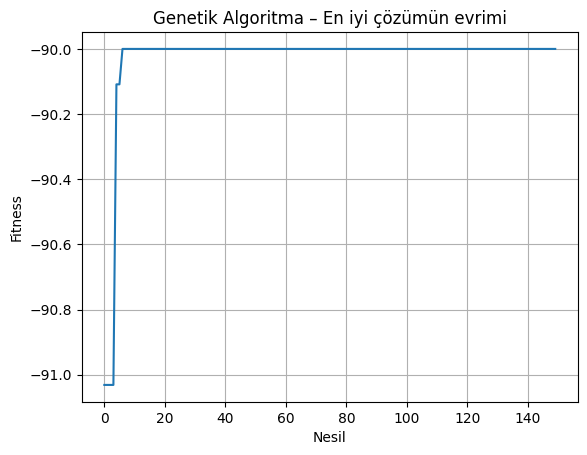

In [29]:
plt.plot(history)
plt.title("Genetik Algoritma – En iyi çözümün evrimi")
plt.xlabel("Nesil")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()

En iyi çözüm genellikle kısıtların sınırında elde edilmiştir:

- \( x_1 \approx 60 \) km/saat  
- \( x_2 \approx 10 \) ton  

Bu değerler hem motor gücü kısıtını (\(x_1 \cdot x_2 \le 700\)) hem de minimum hız kısıtını (\(x_1 \ge 60\)) sağlamaktadır.  
Grafikten görüldüğü gibi, nesiller ilerledikçe en iyi uygunluk değeri artmış ve belli bir noktadan sonra kararlı hale gelmiştir.
